In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [9]:
!pip install scikit-learn==0.24

In [10]:
!pip install pmdarima==1.8.0

In [11]:
filename = "/content/gdrive/My Drive/BITS/4-2/ASM_sop/Rajasthan1/dataset.csv"
# The data of all the files from year 2000-2014 of AP have been combined and put into one file called Dataset
df = pd.read_csv(filename)
df=df.iloc[:,:17]
df

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Snow Depth
0,2000,1,1,0,0,0,0,0,0,0,0,-4,13.811437,982.749817,27.447862,174.755997,0
1,2000,1,1,1,0,0,0,0,0,0,0,-4,13.117300,982.670105,29.048857,169.544205,0
2,2000,1,1,2,0,0,0,0,0,0,0,-4,12.433960,982.404175,31.216659,156.340938,0
3,2000,1,1,3,0,0,0,0,0,0,0,-3,11.797632,982.555298,34.956075,142.945864,0
4,2000,1,1,4,0,0,0,0,0,0,0,-1,11.195487,982.558106,41.177540,129.625767,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131395,2014,12,31,19,0,0,0,0,0,0,0,-18,14.736618,985.312622,8.545349,109.345042,0
131396,2014,12,31,20,0,0,0,0,0,0,0,-18,13.804154,986.000549,8.901171,122.334315,0
131397,2014,12,31,21,0,0,0,0,0,0,0,-18,12.933973,986.018555,9.348792,135.562509,0
131398,2014,12,31,22,0,0,0,0,0,0,0,-18,12.142112,985.832092,9.821783,148.928152,0


In [12]:
df['Date']=df['Year'].astype(str) + df['Month'].astype(str).str.zfill(2) + df['Day'].astype(str).str.zfill(2) + df['Hour'].astype(str).str.zfill(2)+df['Minute'].astype(str)

df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d%H%M')
df.head(10)

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Snow Depth,Date
0,2000,1,1,0,0,0,0,0,0,0,0,-4,13.811437,982.749817,27.447862,174.755997,0,2000-01-01 00:00:00
1,2000,1,1,1,0,0,0,0,0,0,0,-4,13.117300,982.670105,29.048857,169.544205,0,2000-01-01 01:00:00
2,2000,1,1,2,0,0,0,0,0,0,0,-4,12.433960,982.404175,31.216659,156.340938,0,2000-01-01 02:00:00
3,2000,1,1,3,0,0,0,0,0,0,0,-3,11.797632,982.555298,34.956075,142.945864,0,2000-01-01 03:00:00
4,2000,1,1,4,0,0,0,0,0,0,0,-1,11.195487,982.558106,41.177540,129.625767,0,2000-01-01 04:00:00
5,2000,1,1,5,0,0,0,0,0,0,0,-11,11.136730,984.379272,19.563755,116.428208,0,2000-01-01 05:00:00
6,2000,1,1,6,0,0,0,0,0,0,0,-10,10.646979,985.168579,21.357848,103.583783,0,2000-01-01 06:00:00
7,2000,1,1,7,0,0,0,0,0,0,0,-9,11.265209,985.925598,22.168916,91.181648,0,2000-01-01 07:00:00
8,2000,1,1,8,0,78,306,135,74,354,139,-8,14.277325,986.486450,20.120814,79.450627,0,2000-01-01 08:00:00
9,2000,1,1,9,0,114,597,331,121,600,339,-6,17.677278,986.856323,18.365240,68.755938,0,2000-01-01 09:00:00


In [13]:
X=df[['Date','GHI']]
X.set_index('Date',inplace=True)
print(X.shape)

(131400, 1)


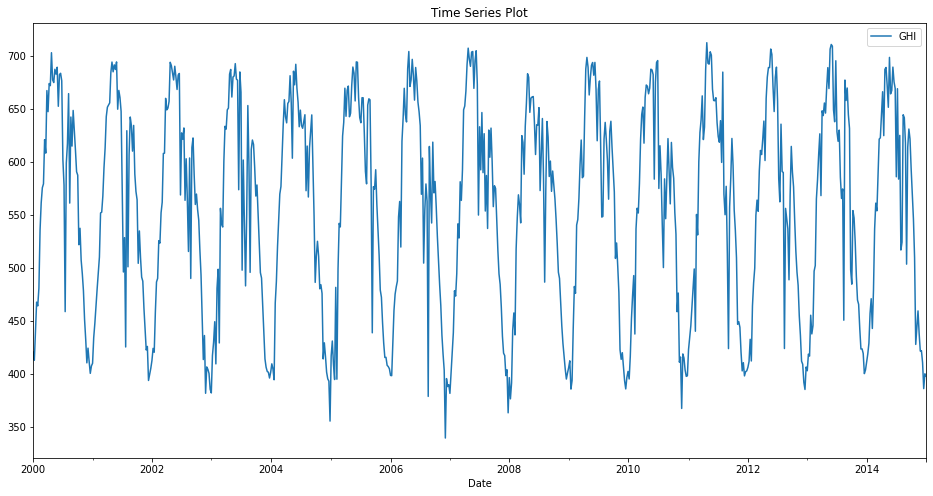

In [14]:
#y=X['GHI']
X=X.between_time('08:00','17:00',include_start=True,include_end=True)
X=X.reset_index()
y=X.resample('W-FRI',on='Date').mean()
y=y.dropna()
#y=np.log(y+1)
del X
del df
y.plot(figsize=[16,8],title='Time Series Plot')

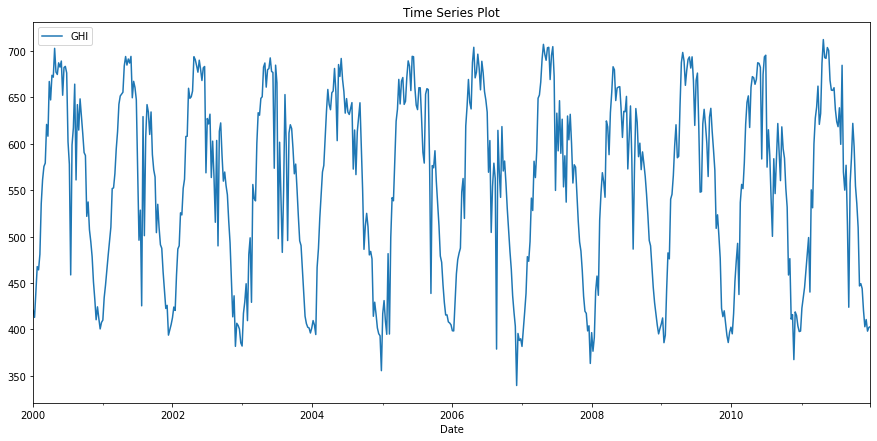

In [15]:
y[:'2011'].plot(figsize=[15,7],title='Time Series Plot')

In [16]:
X_train=y[:'2011']
X_test=y['2012':]

In [17]:
X_test

,GHI
Date,
2012-01-06,406.128571
2012-01-13,411.528571
2012-01-20,432.585714
2012-01-27,412.128571
2012-02-03,464.085714
...,...
2014-12-05,421.871429
2014-12-12,410.628571
2014-12-19,386.057143


In [18]:
np.any(np.isnan(X_train))

False

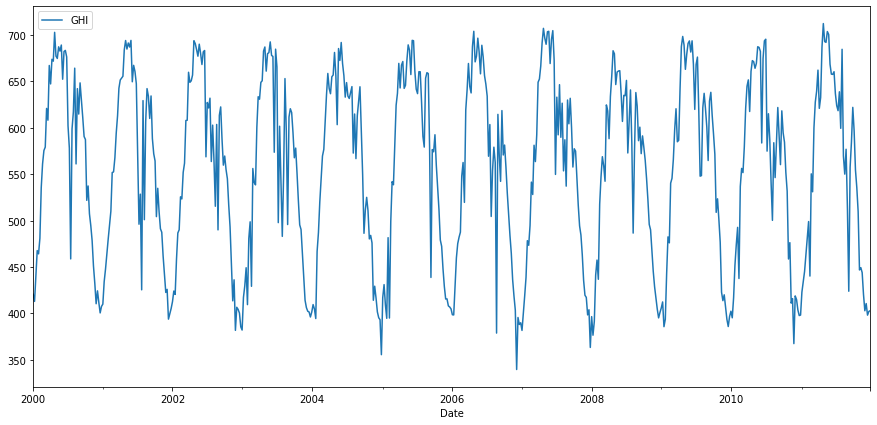

In [19]:
X_train.plot(figsize=(15,7))

In [ ]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(X_train, start_p=0, start_q=0,max_p=1,max_d=1, max_q=1, d=1, m=52,trace=True,error_action='ignore',suppress_warnings=True,stepwise=True)
stepwise_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[52] intercept   : AIC=inf, Time=14.20 sec
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=6473.508, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=6403.360, Time=3.85 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=6406.742, Time=4.39 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=6471.508, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[52] intercept   : AIC=6426.214, Time=0.06 sec
 ARIMA(1,1,0)(2,0,0)[52] intercept   : AIC=6393.054, Time=19.04 sec
 ARIMA(1,1,0)(2,0,1)[52] intercept   : AIC=inf, Time=34.43 sec
 ARIMA(1,1,0)(1,0,1)[52] intercept   : AIC=inf, Time=13.48 sec
 ARIMA(0,1,0)(2,0,0)[52] intercept   : AIC=6462.200, Time=14.17 sec
 ARIMA(1,1,1)(2,0,0)[52] intercept   : AIC=6378.524, Time=37.83 sec
 ARIMA(1,1,1)(1,0,0)[52] intercept   : AIC=6398.422, Time=6.48 sec
 ARIMA(1,1,1)(2,0,1)[52] intercept   : AIC=inf, Time=89.40 sec
 ARIMA(1,1,1)(1,0,1)[52] intercept   : AIC=inf, Time=24.14 sec
 ARIMA(0,1,1)(2,0,0)[52] intercept  

In [ ]:
stepwise_model.fit(X_train)
#print(stepwise_model.summary())

In [ ]:
X_test.shape

In [ ]:
pred=stepwise_model.predict(n_periods=157)

In [ ]:
pred = pd.DataFrame(pred,index = X_test.index,columns=['Prediction'])
pd.concat([X_test,pred],axis=1).plot(figsize=(20,10))

In [ ]:
df1 = pd.read_csv('/content/gdrive/My Drive/BITS/4-2/ASM_sop/Code/Rajasthan1/MLP_monthly.csv')
df2 = pd.read_csv('/content/gdrive/My Drive/BITS/4-2/ASM_sop/Code/Rajasthan1/LSTM_monthly.csv')

plt.figure(figsize = (20,10))
plt.plot(X_test.index,df1['GHI'],color='orange',label='MLP model')
#plt.plot(df1['Date'],df2['GHI'], color= 'blue', label= 'LSTM model')
plt.plot(X_test.index,pred , color= 'green', label= 'SARIMA model') 
plt.plot(X_test.index,X_test , color= 'red', label= 'Actual GHI') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(X_test,pred)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X_test, pred, squared=False)